In [1]:
# 初回ライブラリ読み込み
from pathlib import Path
from ipyfilechooser import FileChooser

import warnings
warnings.filterwarnings("ignore")

import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
plt.rcParams["font.family"] = "Meiryo"
plt.rcParams["savefig.dpi"] = 100
import bqplot.pyplot as bqp

import cv2

In [2]:
notebook_dir = Path().absolute()
display(f"notebook_dir: {notebook_dir}")

root_dir = notebook_dir.parents[0]
display(f"root_dir: {root_dir}")

'notebook_dir: c:\\Users\\k2mks\\Documents\\ws\\voila_app\\app\\notebook'

'root_dir: c:\\Users\\k2mks\\Documents\\ws\\voila_app\\app'

### 画像ファイルの選択

In [3]:
image_path = FileChooser(root_dir)
display(image_path)

FileChooser(path='C:\Users\k2mks\Documents\ws\voila_app\app', filename='', title='', show_hidden=False, select…

In [4]:
image_path = Path(image_path.selected_path) / image_path.selected_filename
display(image_path)

WindowsPath('C:/Users/k2mks/Documents/ws/voila_app/app/img/error.png')

## Pyplotを使った画像の描写

In [5]:
# bqp.figure()
# bqp.imshow(image_path, "filename")
# bqp.show()

In [7]:
img = cv2.imread(str(image_path))

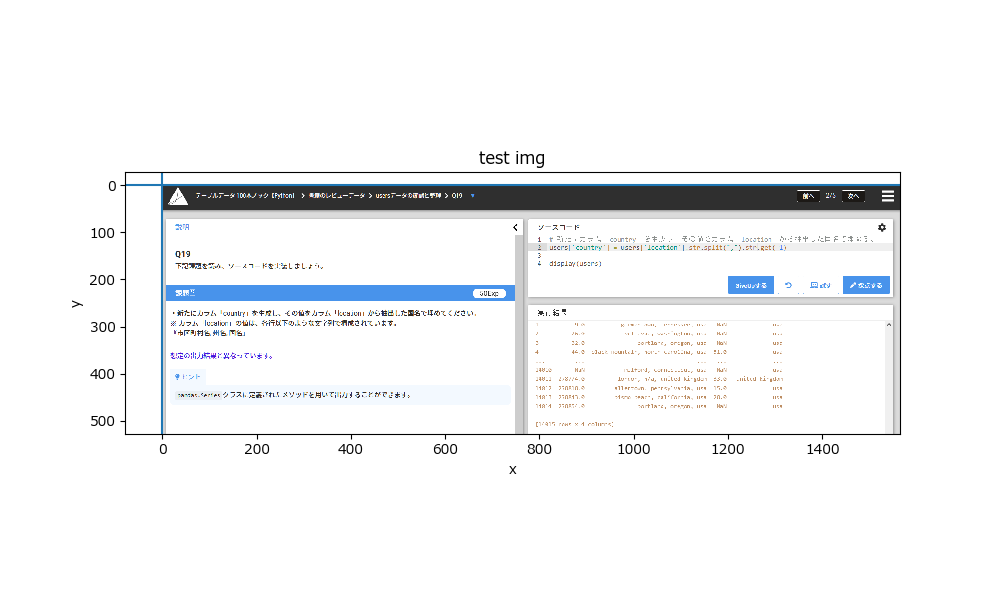

In [8]:
# マスクの作成に必要な情報を出力するにあたって、一度作成したマスクをリセットする機能は必要
# widgets.ToggleButton(value = False, description="多角形リセット",disable=False,icon="check")


area_poly = []

fig, ax = plt.subplots(figsize=(10,6))
img = ax.imshow(img, cmap=plt.cm.gist_earth, interpolation="nearest", origin="upper", alpha=1)

ax.set_title("test img")
ax.set_xlabel("x")
ax.set_ylabel("y")

# ln = ax.plot([],[],"bo")
cur_v = ax.axvline(-1)
cur_h = ax.axhline(-1)

def motion(event):
    x = event.xdata
    y = event.ydata
    cur_v.set_xdata(x)
    cur_h.set_ydata(y)
    plt.draw()

# スコープの悪用(area_poly)
def onclick(event):
    x = event.xdata
    y = event.ydata
    ax.set_title(f"x:{x:.3f}, y:{y:.3f}")
    area_poly.append((x,y))
    plt.draw()

# マスクエリアの可視化
def plot_poly(event):
    x = event.xdata
    y = event.ydata
    plt.fill(area_poly, alpha = 0.5)
    plt.draw()

fig.canvas.mpl_connect("motion_notify_event", motion)
fig.canvas.mpl_connect("button_press_event", onclick)
#fig.canvas.mpl_connect("button_press_event", plot_poly)

plt.show()

# 一つのマスクを作成したらその内容を保存して初期化しておく必要がある
# widgets.ToggleButton(value = False, description="多角形出力",disable=False,icon="check")

# 保存する際には一意に名前が決まるように名前を設定する必要がある
# widgets.Text(value='マスク1',placeholder='Type something',description='マスク名:',disabled=False)

In [9]:
import json

mask_name = "mask01"

# ファイルとして出力
with open(root_dir / "config" / "mask" / f"{mask_name}.json", 'w') as f:
    json.dump({"poly_list":area_poly}, f, indent=2)